In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data\\Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
def clean_data(df):
    def derivedCol(Genre):
        """
        Transform based on the following examples:
           Genre       Output
        1: "Male"   => "0"
        2: "Female" => "1"
        """
        if Genre == "Female":
            return "1"
        if Genre == "Male":
            return "0"
        return None
    df.insert(2, "derivedCol", df.apply(
        lambda row: derivedCol(row["Genre"]), axis=1))
    df = df.drop(columns=['Genre'])
    df = df.rename(columns={'derivedCol': 'Gender'})
    return df


df = clean_data(df.copy())
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


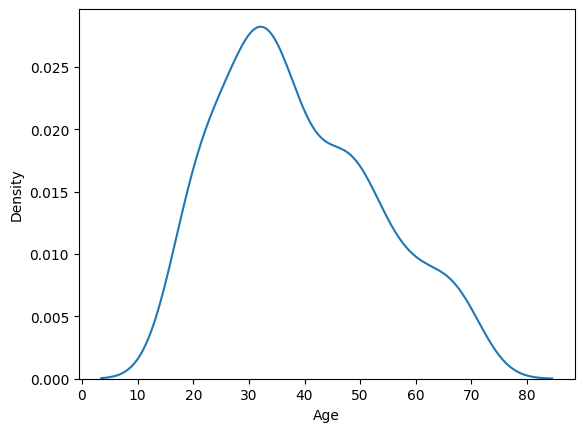

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(df['Age'])
plt.show()

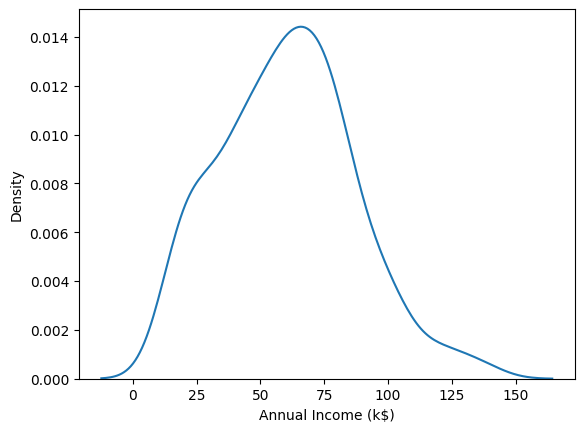

In [9]:
sns.kdeplot(df['Annual Income (k$)'])
plt.show()

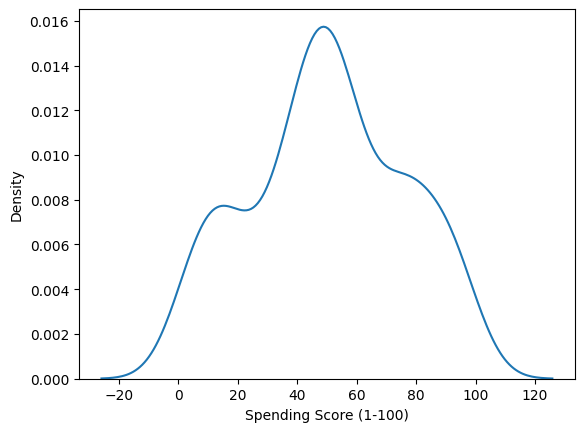

In [10]:
sns.kdeplot(df['Spending Score (1-100)'])
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
columns_to_standardize = [
    'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [12]:
df_sd = sd.fit_transform(df[columns_to_standardize])

In [13]:
sd_df = pd.DataFrame(df_sd, columns=columns_to_standardize)

In [14]:
df[columns_to_standardize] = sd_df

In [15]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,-1.424569,-1.738999,-0.434801
1,2,0,-1.281035,-1.738999,1.195704
2,3,1,-1.352802,-1.700830,-1.715913
3,4,1,-1.137502,-1.700830,1.040418
4,5,1,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,196,1,-0.276302,2.268791,1.118061
196,197,1,0.441365,2.497807,-0.861839
197,198,0,-0.491602,2.497807,0.923953
198,199,0,-0.491602,2.917671,-1.250054


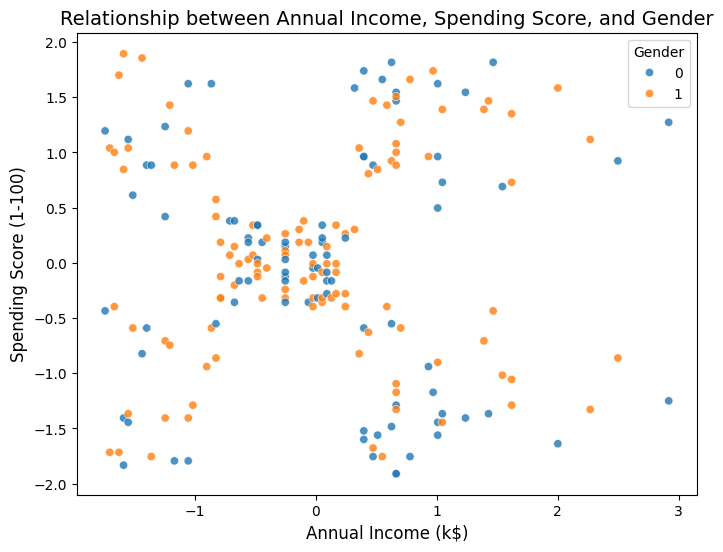

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of Annual Income and Spending Score, color-coded by Gender
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender',
    data=df,
    alpha=0.8
)


plt.title(
    'Relationship between Annual Income, Spending Score, and Gender', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)


plt.legend(title='Gender')
plt.show()

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [18]:
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Test for clusters 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[columns_to_standardize])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(
        df[columns_to_standardize], kmeans.labels_))

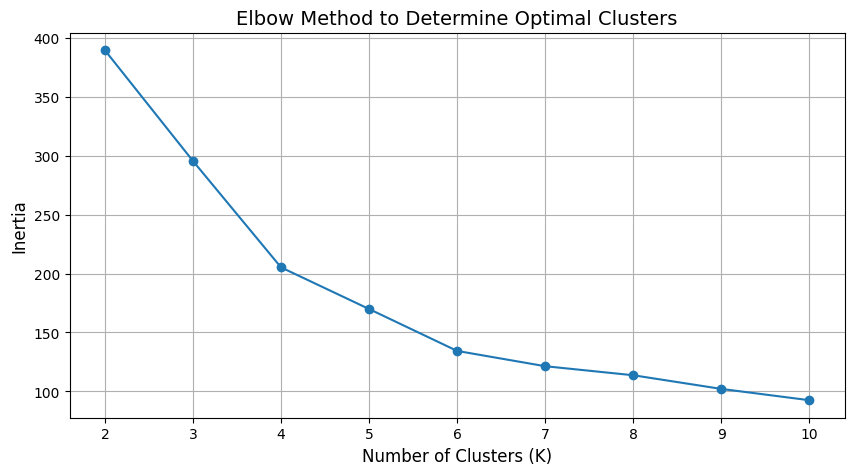

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.show()

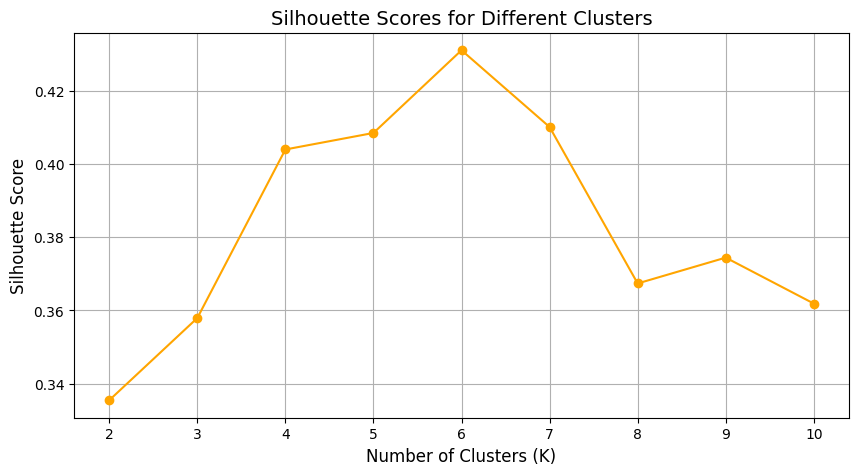

In [20]:
# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Clusters', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.show()

In [21]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(
    df[['Annual Income (k$)', 'Spending Score (1-100)']])

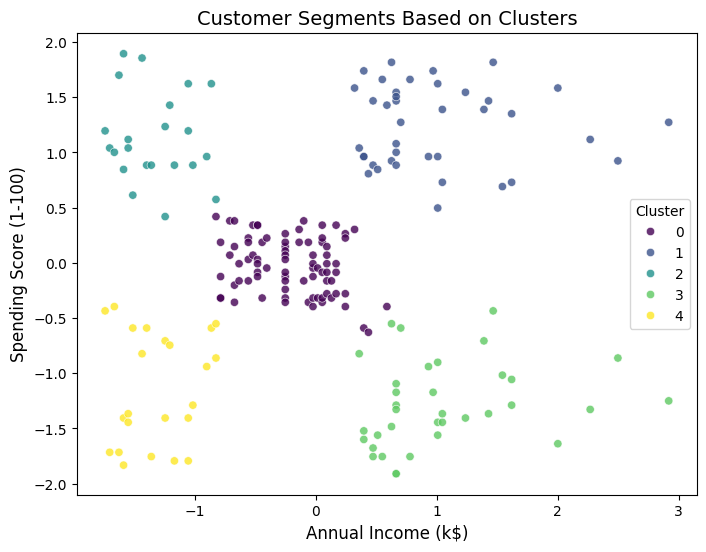

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    data=df,
    alpha=0.8
)
plt.title('Customer Segments Based on Clusters', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Cluster')
plt.show()